In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('50_Startups.csv')

In [3]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [4]:
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [5]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

## Encoding categorical data

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [7]:
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set


In [9]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results


In [10]:
y_pred=lr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


# Visualize a multiple linear regression model using some of these techniques


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

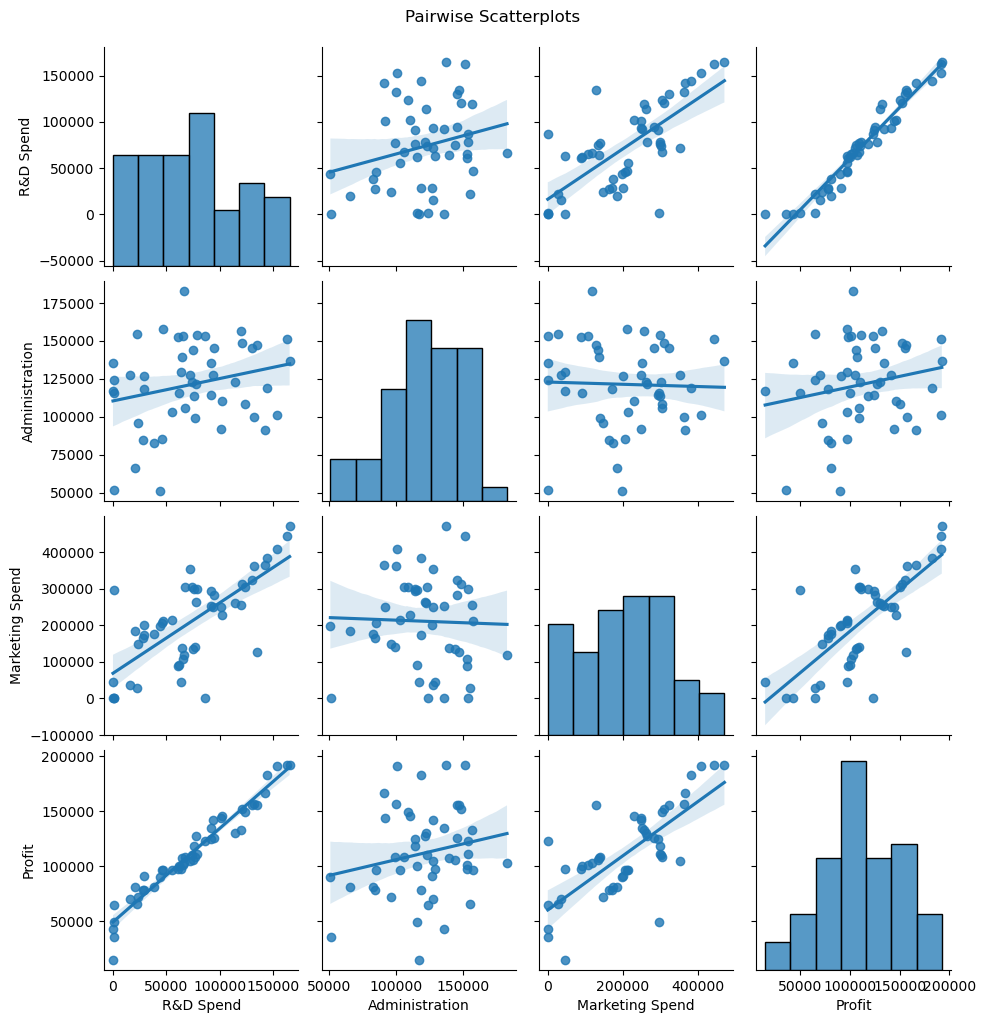

In [12]:
# 1. Pairwise Scatterplots
sns.pairplot(data, kind="reg")
plt.suptitle("Pairwise Scatterplots", y=1.02)
plt.show()

In [15]:
# Asılı və müstəqil dəyişənləri təyin etmək
X = data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = data['Profit']

# Regressiya modelini qurmaq
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

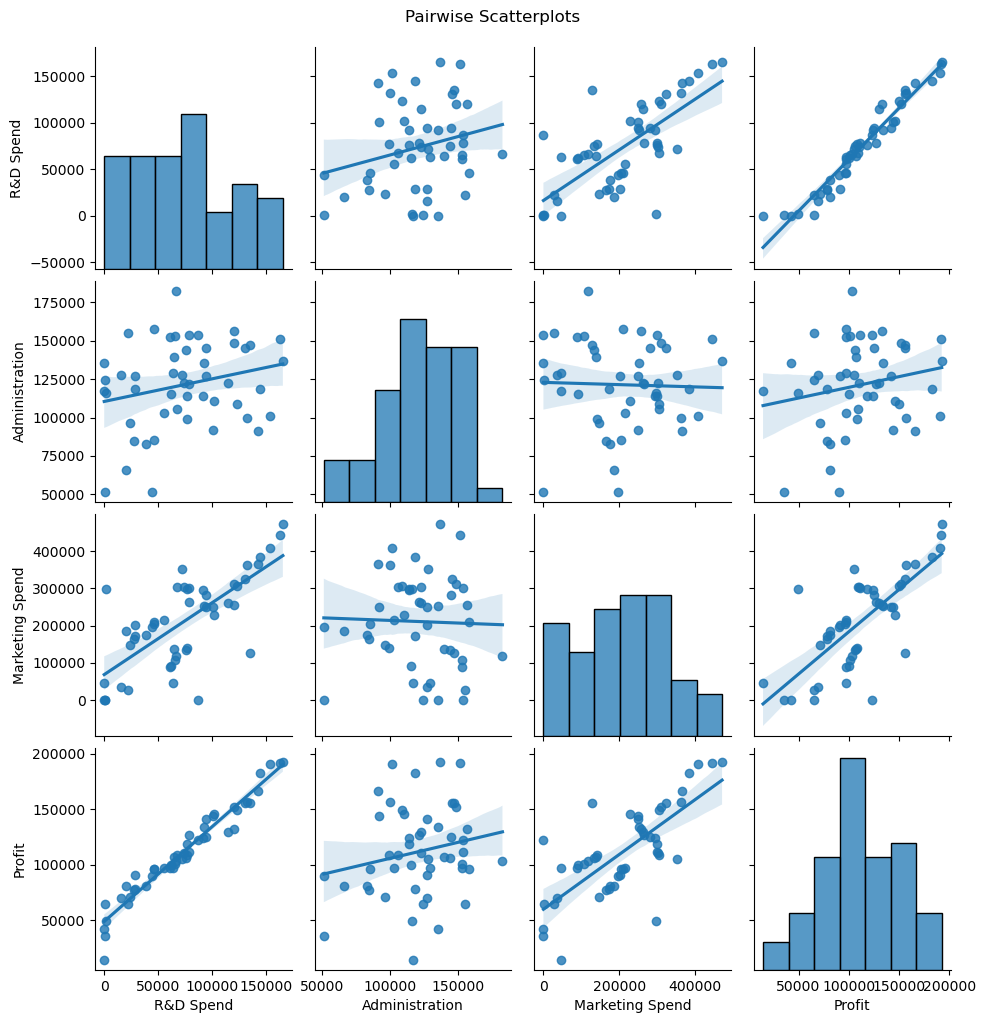

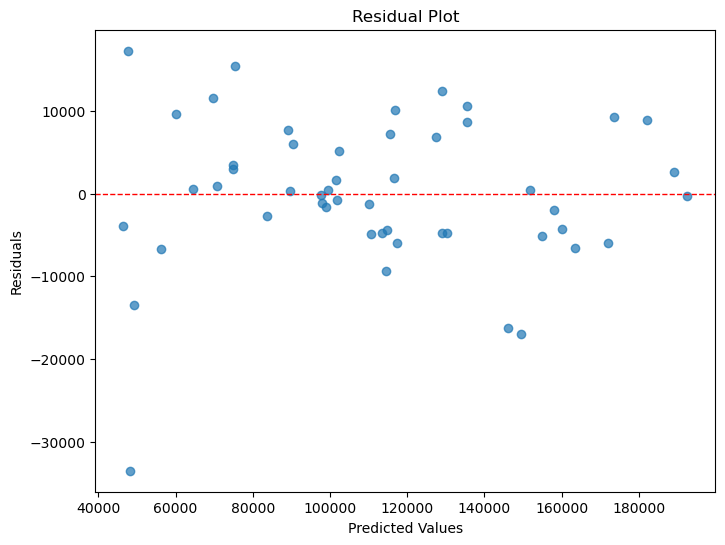

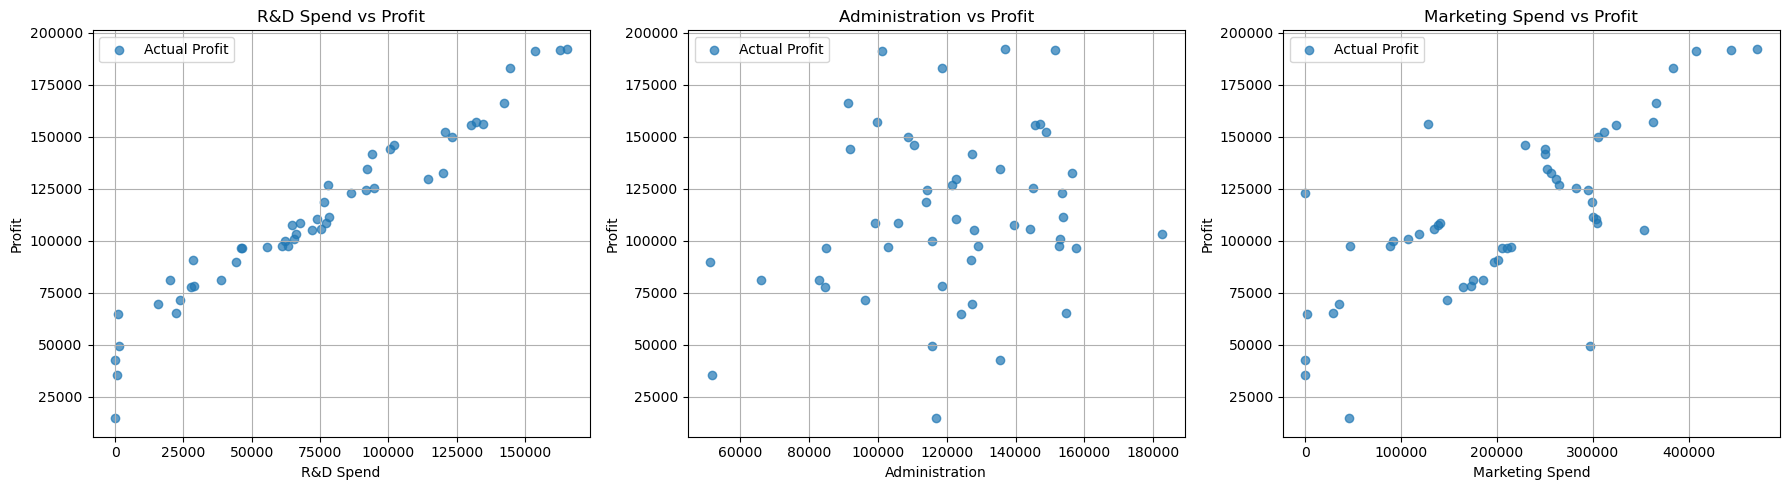

In [16]:
# 1. Pairwise Scatterplots
sns.pairplot(data[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']], kind="reg")
plt.suptitle("Pairwise Scatterplots", y=1.02)
plt.show()

# 2. Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 3. Feature vs Profit Scatterplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
features = ['R&D Spend', 'Administration', 'Marketing Spend']
for i, feature in enumerate(features):
    axes[i].scatter(data[feature], y, alpha=0.7, label='Actual Profit')
    axes[i].set_title(f'{feature} vs Profit')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Profit')
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# R-squared dəyəri
r2 = r2_score(y, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)

# Nəticələri çap etmək
print("R-Squared (R²):", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


R-Squared (R²): 0.9507459940683246
Mean Squared Error (MSE): 78417126.0191308
Root Mean Squared Error (RMSE): 8855.344489015139
Mean Absolute Error (MAE): 6471.4503961048085


In [21]:
# correlation matrix

x = data['R&D Spend']
y = data['Profit']

# Calculate the Pearson correlation coefficient
correlation = x.corr(y)

# Print the result
print(f"Correlation between R&D Spend and Profit: {correlation:.2f}")


Correlation between R&D Spend and Profit: 0.97
